- **Project Name -MOVIE RATING PREDICTION WITH PYTHON**
- **Developed By - Aarchi Jain (aarchi0212@gmail.com)**
- **Branch Name- Information Technology**
- **Institute Name- Dr. Akhilesh Das Gupta Institute Of Technology And Management**
- **Submitted To - CodSoft**

## Problem Statement

**Task -2 (MOVIE RATING PREDICTION WITH PYTHON)**

- Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
- The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.
- Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data

In [2]:
movies=pd.read_csv("D:\Aarchi Jain\IMDb Movies India.csv", encoding='ISO-8859-1' )

In [3]:
movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,[Drama],NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109 min,[Drama],7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90 min,"[Drama, Musical]",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110 min,"[Comedy, Romance]",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105 min,[Drama],NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988.0,NaN,[Action],4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999.0,129 min,"[Action, Drama]",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005.0,NaN,[Action],NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988.0,NaN,[Action],NaN,NaN,NaN,NaN,NaN,NaN


## Data Exploration

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [5]:
movies.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,1987.012215,5.841621
std,25.416689,1.381777
min,1913.000000,1.100000
25%,1968.000000,4.900000
50%,1991.000000,6.000000
75%,2009.000000,6.800000
max,2022.000000,10.000000


In [6]:
movies.describe(include="object")

,Name,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,7240,13632,7920,14984,13892,13125,12365
unique,13838,182,485,2034,5938,4718,4891,4820
top,Anjaam,120 min,[Drama],8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,240,2780,227,58,158,83,91


## Data Filtering and Preprocessing 

In [7]:
movies.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

There are many null value so we have to deal with it.

In [8]:
movies.shape

(15509, 10)

In [9]:
unique_genre= movies["Genre"].unique()
print("Unique Genres :",unique_genre)

Unique Genres : ['[Drama]' '[Drama, Musical]' '[Comedy, Romance]'
 '[Comedy, Drama, Musical]' '[Drama, Romance, War]' '[Documentary]'
 '[Horror, Mystery, Thriller]' '[Action, Crime, Thriller]' '[Horror]'
 '[Horror, Romance, Thriller]' '[Comedy, Drama, Romance]' '[Thriller]'
 '[Comedy, Drama]' nan '[Comedy, Drama, Fantasy]'
 '[Comedy, Drama, Family]' '[Crime, Drama, Mystery]' '[Horror, Thriller]'
 '[Biography]' '[Comedy, Horror]' '[Action]' '[Drama, Horror, Mystery]'
 '[Comedy]' '[Action, Thriller]' '[Drama, History]'
 '[Drama, History, Sport]' '[Horror, Mystery, Romance]'
 '[Horror, Mystery]' '[Drama, Horror, Romance]' '[Action, Drama, History]'
 '[Action, Drama, War]' '[Comedy, Family]' '[Adventure, Horror, Mystery]'
 '[Action, Sci-Fi]' '[Crime, Mystery, Thriller]' '[War]' '[Sport]'
 '[Biography, Drama, History]' '[Horror, Romance]' '[Crime, Drama]'
 '[Drama, Romance]' '[Adventure, Drama]' '[Comedy, Mystery, Thriller]'
 '[Action, Crime, Drama]' '[Crime, Thriller]' '[Horror, Sci-Fi, Th

Here all are the unique genre of movie 

In [10]:
rating= movies["Rating"].value_counts()
print("Rating Distribution:\h ", rating)

Rating Distribution:\h  6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: Rating, Length: 84, dtype: int64


In [11]:
movies.drop_duplicates(inplace= True)
movies.shape

(15503, 10)

In [12]:
att=["Name","Year","Duration","Votes","Rating"]
movies.dropna(subset =att,inplace= True)
missing_value = movies.isna().sum()
print(missing_value)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


In [13]:
movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109 min,[Drama],7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110 min,"[Comedy, Romance]",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147 min,"[Comedy, Drama, Musical]",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142 min,"[Drama, Romance, War]",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82 min,"[Horror, Mystery, Thriller]",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015.0,115 min,[Drama],6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001.0,153 min,"[Biography, Drama, History]",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989.0,125 min,"[Action, Crime, Drama]",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999.0,129 min,"[Action, Drama]",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [14]:
movie_name_rating = movies[["Name","Rating"]]
print(movie_name_rating)

                                     Name  Rating
1      #Gadhvi (He thought he was Gandhi)     7.0
3                                 #Yaaram     4.4
5                    ...Aur Pyaar Ho Gaya     4.7
6                               ...Yahaan     7.4
8                      ?: A Question Mark     5.6
...                                   ...     ...
15493                              Zubaan     6.1
15494                            Zubeidaa     6.2
15503                     Zulm Ki Zanjeer     5.8
15505                               Zulmi     4.5
15508                        Zulm-O-Sitam     6.2

[5851 rows x 2 columns]


**Prediction of the top movies based on rating**

<function matplotlib.pyplot.show(close=None, block=None)>

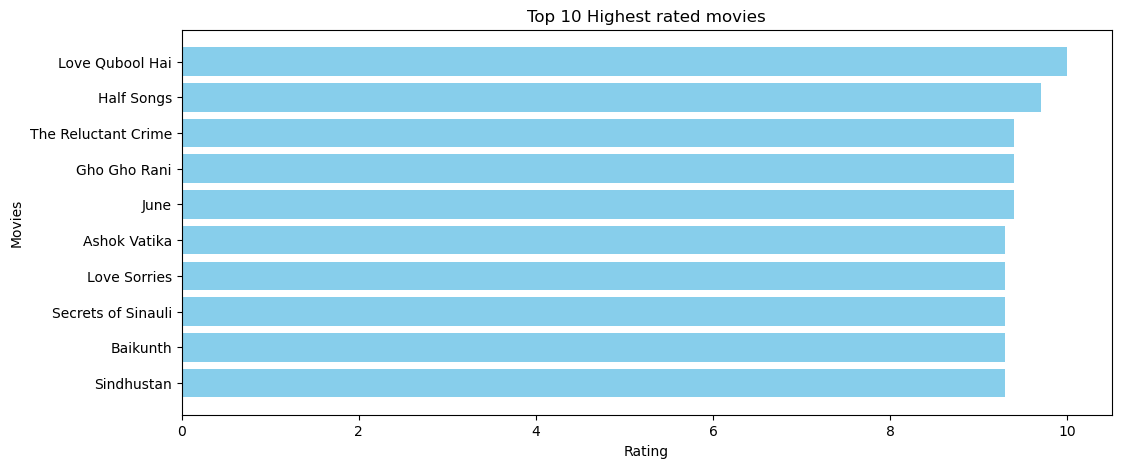

In [15]:
top_rated_movies= movies.sort_values('Rating', ascending=False)
plt.figure(figsize=(12,5))

plt.barh(top_rated_movies['Name'].head(10),top_rated_movies['Rating'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Rating")
plt.ylabel("Movies")
plt.title("Top 10 Highest rated movies")
plt.show

**Prediction of the top movies based on actor performance**

<function matplotlib.pyplot.show(close=None, block=None)>

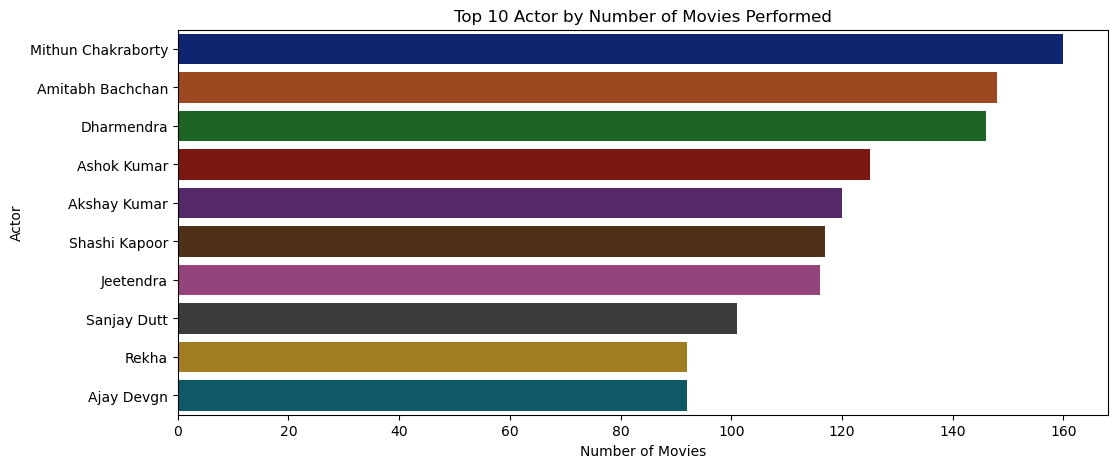

In [16]:
Actors = pd.concat([movies["Actor 1"],movies["Actor 2"],movies["Actor 3"]])
actor_counts = Actors.value_counts().reset_index()
actor_counts.columns = ["Actor","Number of Movies"]
plt.figure(figsize=(12,5))
sns.barplot(x= "Number of Movies", y="Actor", data=actor_counts.head(10),palette= "dark")
plt.xlabel("Number of Movies")
plt.ylabel("Actor")
plt.title("Top 10 Actor by Number of Movies Performed")         
plt.show         


**Prediction of the top movies based on directed movie by director**

<function matplotlib.pyplot.show(close=None, block=None)>

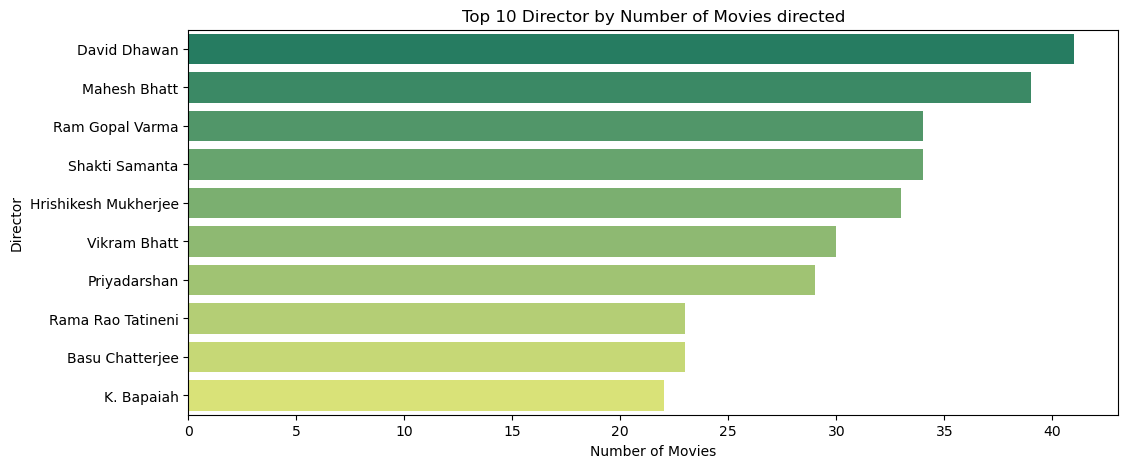

In [17]:
Director=movies["Director"]
director_counts = Director.value_counts().reset_index()
director_counts.columns = ["Director","Number of Movies"]
plt.figure(figsize=(12,5))
sns.barplot(x= "Number of Movies", y="Director", data=director_counts.head(10),palette= "summer")
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.title("Top 10 Director by Number of Movies directed")         
plt.show

C:\Users\HP\anaconda3\AnacondaNEW\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP\anaconda3\AnacondaNEW\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP\anaconda3\AnacondaNEW\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\HP\anaconda3\AnacondaNEW\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


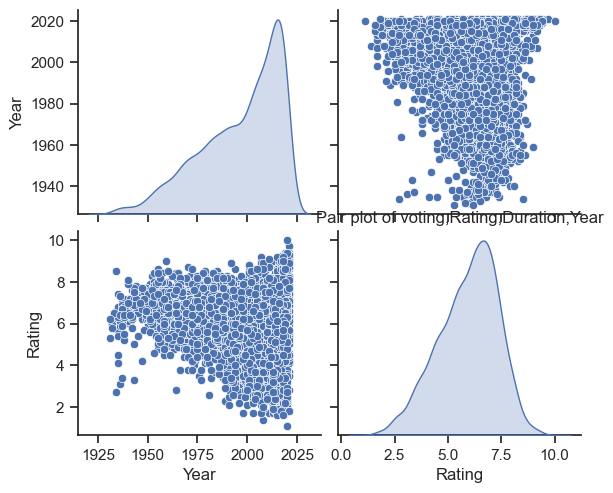

In [18]:
column_interest= ["Year","Duration","Votes","Rating"]
sns.set(style = "ticks")

sns.pairplot(movies[column_interest],diag_kind="kde" ,markers= 'o',palette="virdis",height=2.5,aspect = 1.2)
plt.title("Pair plot of voting,Rating,Duration,Year")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_25732\2476991500.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =movies[numerical_col].corr()


<function matplotlib.pyplot.show(close=None, block=None)>

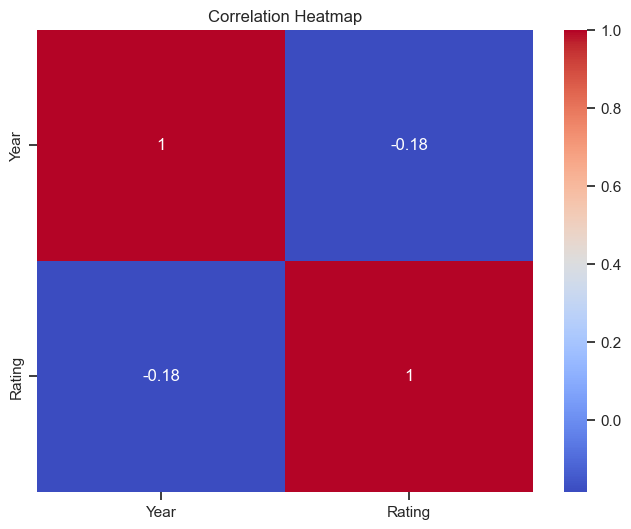

In [19]:
numerical_col=["Year","Duration","Votes","Rating"]
corr_matrix =movies[numerical_col].corr()
plt.figure(figsize =(8,6))
sns.heatmap(corr_matrix, annot=True,cmap ="coolwarm")
plt.title("Correlation Heatmap")
plt.show

In [20]:
#Plot the number of movies released by year
year_count = movies['Year'].value_counts().reset_index()
year_count.columns = ['Year', 'Count']
movies["Year"]=movies["Year"].astype(int)

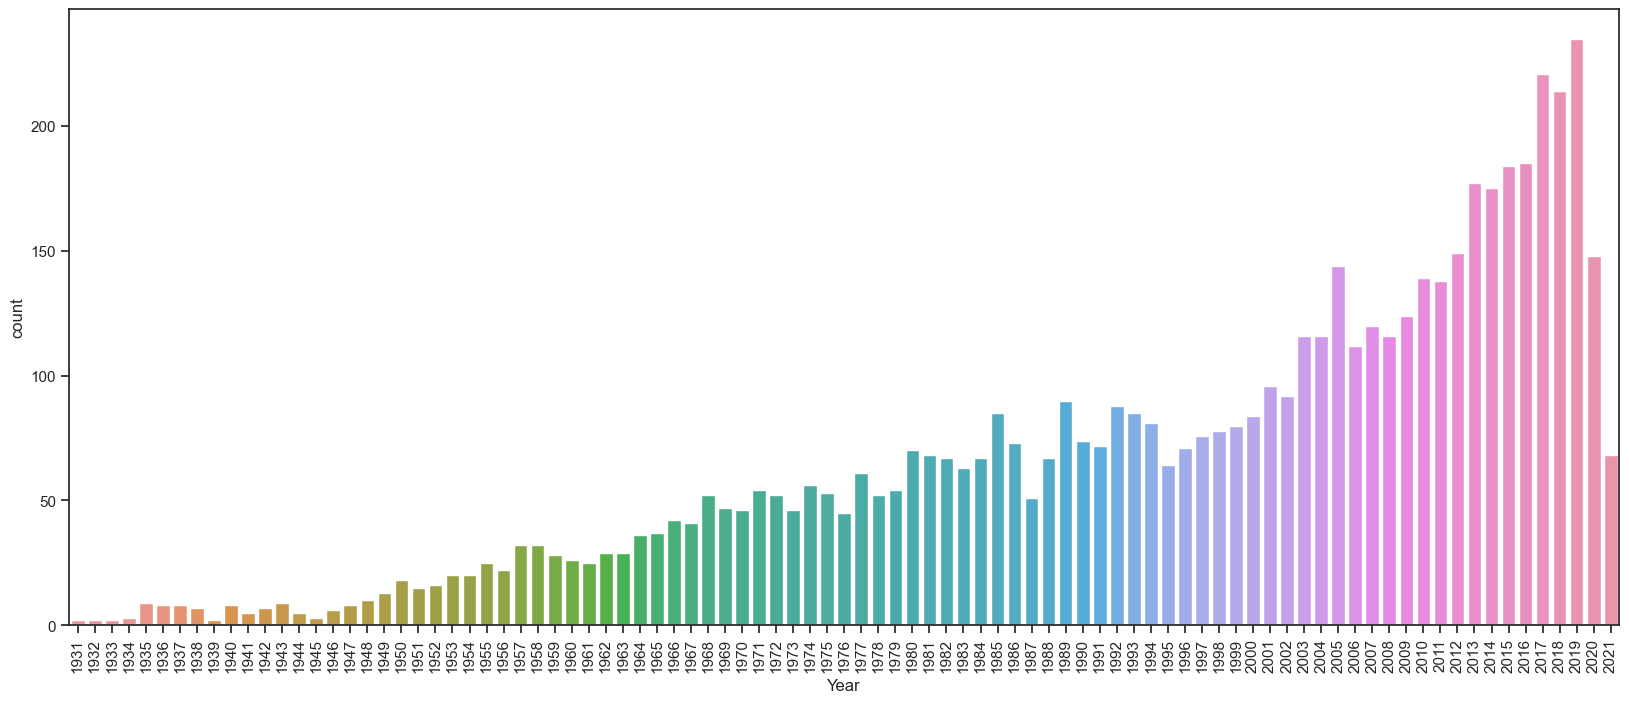

In [21]:
plt.figure(figsize=(20,8))
sns.countplot(x=movies['Year'])
plt.xticks(rotation=90)
plt.show()

**Number of movies released by year**

## Actual and Predicted graph 

<Figure size 800x1200 with 0 Axes>

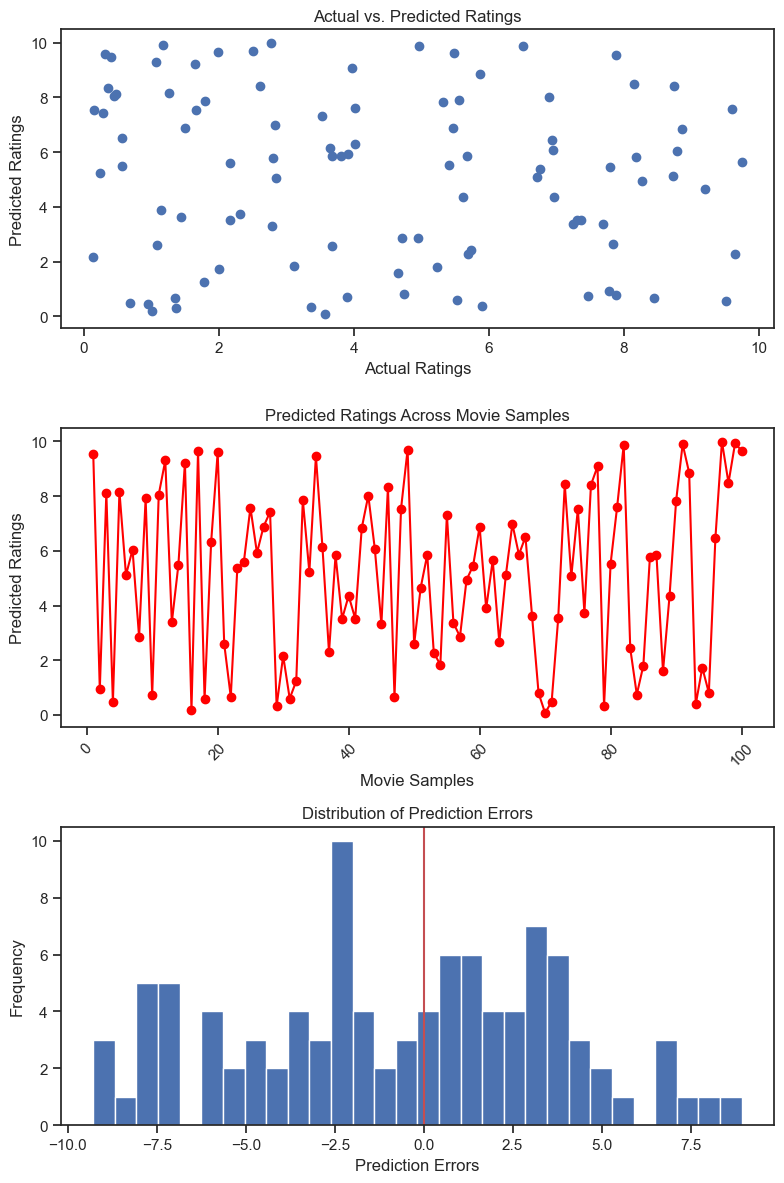

In [22]:
y_test= np.random.rand(100)*10 # Actual ratings 
y_pred=np.random.rand (100)*10 # Predicted ratings
errors= y_test  - y_pred
plt.figure (figsize =(8, 12))
fig,axs= plt.subplots(3, 1,figsize =(8, 12))

axs[0].scatter (y_test, y_pred)
axs[0].set_xlabel("Actual Ratings") 
axs[0].set_ylabel("Predicted Ratings")
axs[0].set_title("Actual vs. Predicted Ratings")
# Line plot
movie_samples = np.arange(1, len(y_pred) + 1)
axs[1].plot(movie_samples, y_pred, marker = 'o',color= "red", linestyle= "-")
axs[1].set_ylabel("Predicted Ratings")
axs[1].set_xlabel("Movie Samples")
axs[1].set_title("Predicted Ratings Across Movie Samples") 
axs[1].tick_params (axis = 'x', rotation = 45)
# Histogram
axs[2].hist (errors, bins = 30)
axs[2].set_xlabel("Prediction Errors") 
axs[2].set_ylabel("Frequency")
axs[2].set_title("Distribution of Prediction Errors")
axs[2].axvline(x=0,color='r')
plt.tight_layout()
plt.show()

## Training Testing

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
movies["Year"]=movies["Year"].astype(str)
movies["Duration"]=movies["Duration"].astype(str)
movies["Votes"]=movies["Votes"].astype(str)
movies["Year"]=movies["Year"].str.extract('(\d+)').astype(float)
movies["Duration"]=movies["Duration"].str.extract('(\d+)').astype(float)
movies["Votes"]=movies["Votes"].str.extract('(\d+)').astype(float)
X=movies[["Year","Duration","Votes"]]
y=movies["Rating"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
movies["Year"]=movies["Year"].astype(int)
movies["Duration"]=movies["Duration"].astype(int)

In [27]:
movies['Votes'] = movies['Votes'].astype(int)
movies['Rating'] = movies['Rating'].astype(int)

In [28]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      5851 non-null   object
 1   Year      5851 non-null   int32 
 2   Duration  5851 non-null   int32 
 3   Genre     5820 non-null   object
 4   Rating    5851 non-null   int32 
 5   Votes     5851 non-null   int32 
 6   Director  5850 non-null   object
 7   Actor 1   5776 non-null   object
 8   Actor 2   5734 non-null   object
 9   Actor 3   5688 non-null   object
dtypes: int32(4), object(6)
memory usage: 411.4+ KB


In [29]:
x=movies[["Year","Duration","Votes"]]
y=movies["Rating"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_predicate=log_reg.predict(x_train)

C:\Users\HP\anaconda3\AnacondaNEW\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
print(accuracy_score(y_predicate, y_train))

0.2962148962148962


## Fitting Naive bayes to training dataset

In [32]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
cla_x=classifier.predict(x_train) 
print(accuracy_score(cla_x,y_train))

0.30964590964590966


In [33]:
classifier.fit(x_test,y_test)
cla_x=classifier.predict(x_test) 
print(accuracy_score(cla_x,y_test))

0.28815489749430523


 **By seeing output two model we can say this is not suitable for training testing model cauracy score is very less**